In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\hi\UkraineConflict.csv", encoding="latin1")
df.head()

,ï»¿EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,NaN,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,NaN,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Rows: 96082
Columns: 31


In [4]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 96082 entries, 0 to 96081
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿EVENT_ID_CNTY    96082 non-null  str    
 1   EVENT_DATE          96082 non-null  str    
 2   YEAR                96082 non-null  int64  
 3   TIME_PRECISION      96082 non-null  int64  
 4   DISORDER_TYPE       96082 non-null  str    
 5   EVENT_TYPE          96082 non-null  str    
 6   SUB_EVENT_TYPE      96082 non-null  str    
 7   ACTOR1              96082 non-null  str    
 8   ASSOC_ACTOR_1       6488 non-null   str    
 9   INTER1              96082 non-null  int64  
 10  ACTOR2              51829 non-null  str    
 11  ASSOC_ACTOR_2       14678 non-null  str    
 12  INTER2              96082 non-null  int64  
 13  INTERACTION         96082 non-null  int64  
 14  CIVILIAN_TARGETING  4188 non-null   str    
 15  ISO                 96082 non-null  int64  
 16  REGION         

In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing %": missing_percent
})

missing_df.head(10)


,Missing Count,Missing %
CIVILIAN_TARGETING,91894,95.641223
TAGS,90144,93.819862
ASSOC_ACTOR_1,89594,93.247434
ASSOC_ACTOR_2,81404,84.723465
ACTOR2,44253,46.057534
ADMIN3,2402,2.499948
ADMIN2,91,0.094711
ADMIN1,17,0.017693
EVENT_TYPE,0,0.000000
DISORDER_TYPE,0,0.000000


In [7]:
df.drop(columns=["ASSOC_ACTOR_1", "CIVILIAN_TARGETING", "TAGS"], inplace=True)


In [10]:

df["FATALITIES"].describe()


count    96082.000000
mean         0.443194
std          6.316090
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        600.000000
Name: FATALITIES, dtype: float64

In [11]:
event_fatalities = df.groupby("EVENT_TYPE")["FATALITIES"].mean().sort_values(ascending=False)
event_fatalities


EVENT_TYPE
Violence against civilians    1.230556
Battles                       0.699114
Explosions/Remote violence    0.362239
Strategic developments        0.010920
Riots                         0.002381
Protests                      0.000717
Name: FATALITIES, dtype: float64

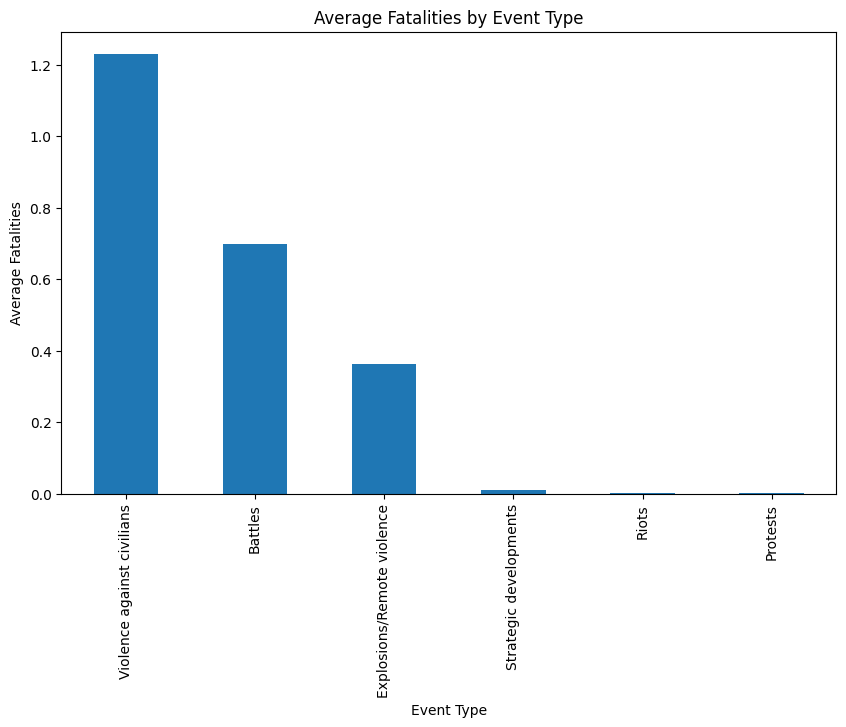

In [12]:
plt.figure(figsize=(10,6))
event_fatalities.plot(kind="bar")

plt.title("Average Fatalities by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Average Fatalities")
plt.show()


In [13]:
region_fatalities = df.groupby("REGION")["FATALITIES"].mean().sort_values(ascending=False)
region_fatalities


REGION
Europe         0.443227
Middle East    0.000000
Name: FATALITIES, dtype: float64

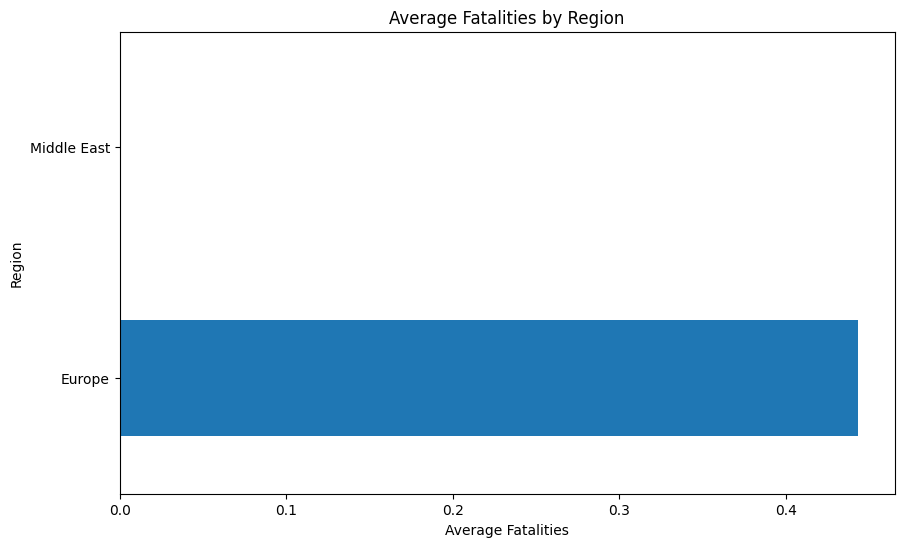

In [14]:
plt.figure(figsize=(10,6))
region_fatalities.plot(kind="barh")

plt.title("Average Fatalities by Region")
plt.xlabel("Average Fatalities")
plt.ylabel("Region")
plt.show()


In [15]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_cols.corr()


In [16]:
corr_matrix["FATALITIES"].sort_values(ascending=False)


FATALITIES        1.000000
INTER2            0.099128
YEAR              0.059950
TIMESTAMP         0.059229
TIME_PRECISION    0.055410
GEO_PRECISION     0.015216
INTER1            0.013263
LATITUDE          0.002670
ISO               0.000680
LONGITUDE        -0.005346
INTERACTION      -0.024580
Name: FATALITIES, dtype: float64

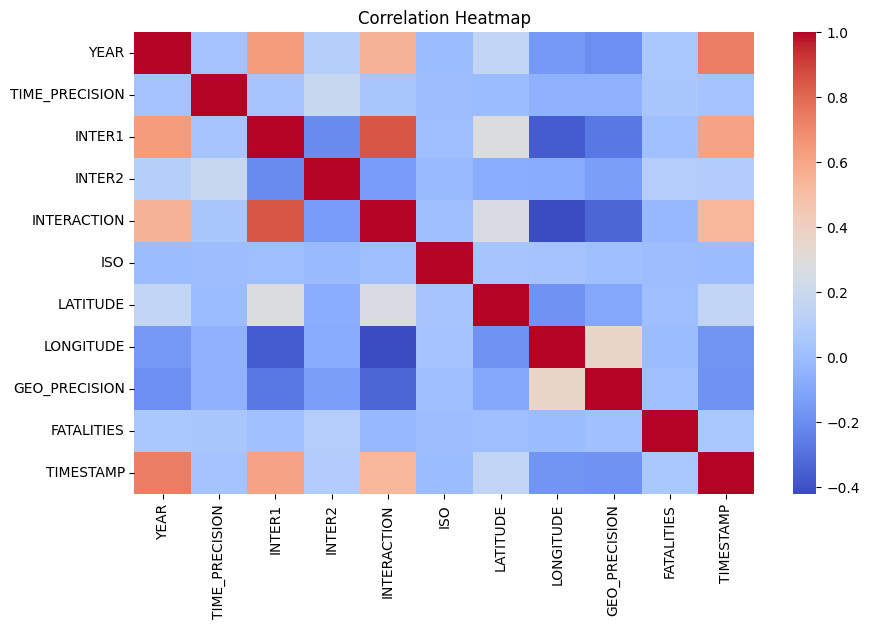

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


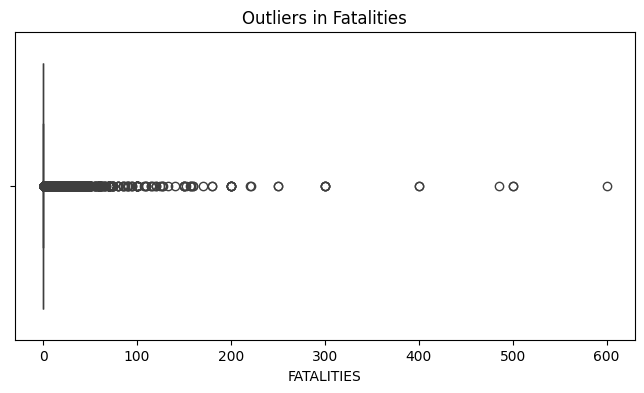

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["FATALITIES"])

plt.title("Outliers in Fatalities")
plt.show()


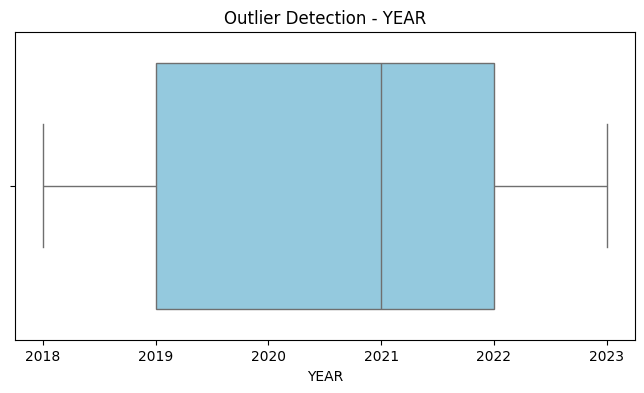

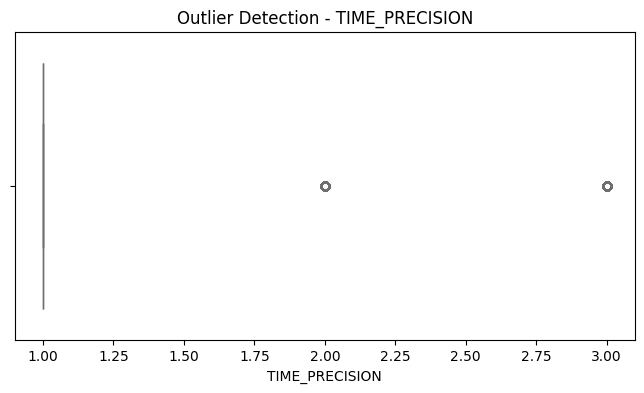

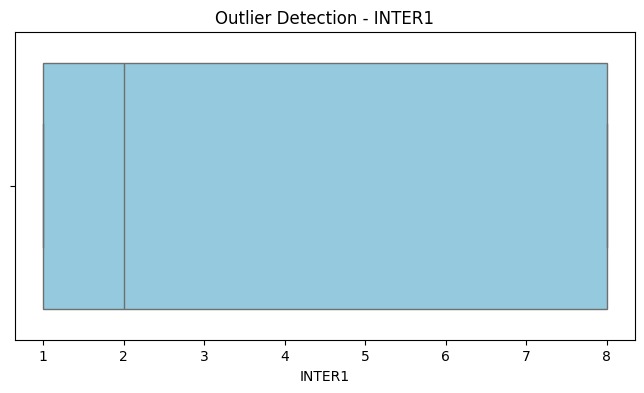

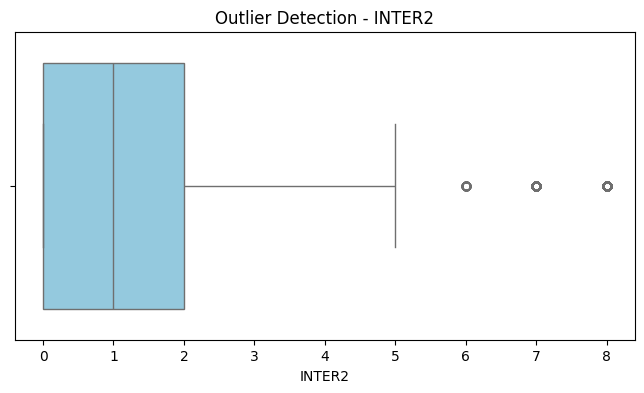

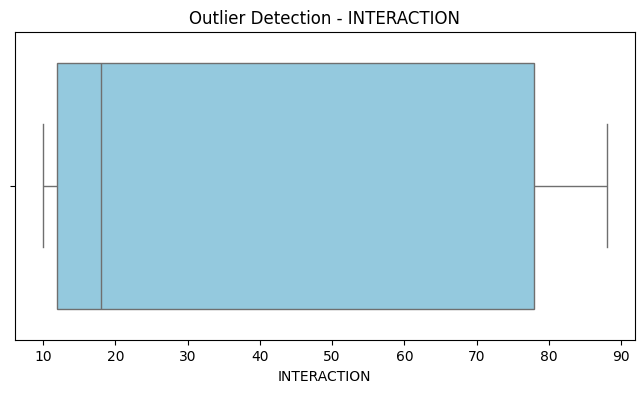

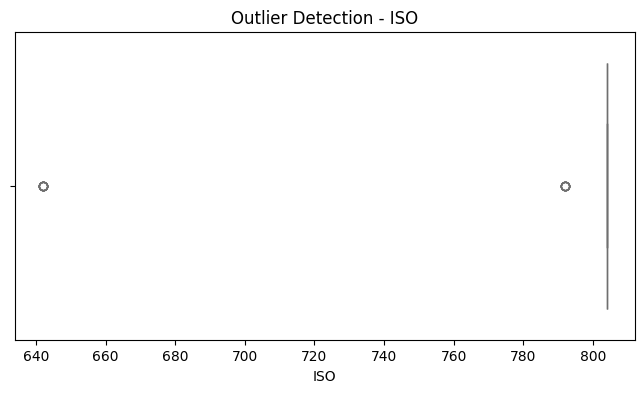

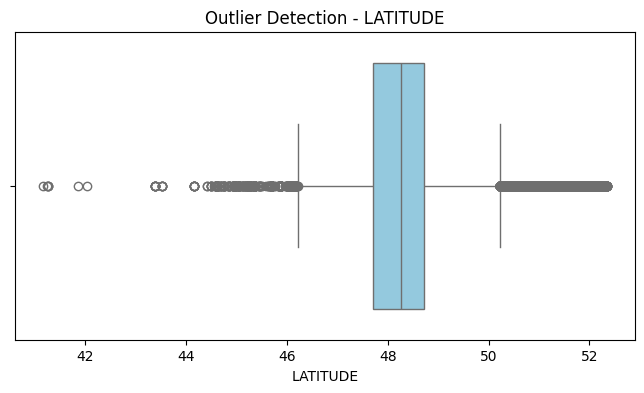

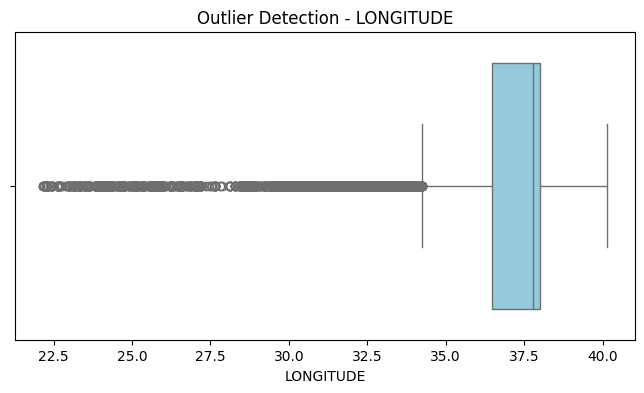

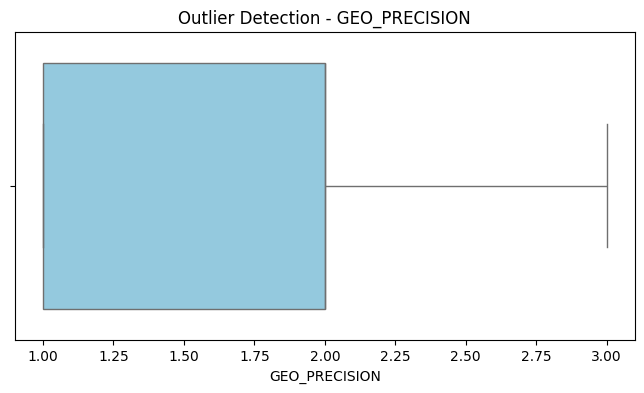

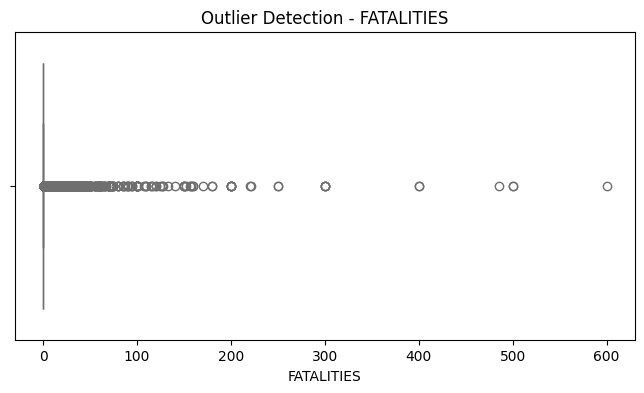

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'YEAR',
    'TIME_PRECISION',
    'INTER1',
    'INTER2',
    'INTERACTION',
    'ISO',
    'LATITUDE',
    'LONGITUDE',
    'GEO_PRECISION',
    'FATALITIES'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)
    plt.show()


In [20]:
cap = df["FATALITIES"].quantile(0.99)
df["FATALITIES"] = np.where(df["FATALITIES"] > cap, cap, df["FATALITIES"])


In [21]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["EVENT_TYPE", "SUB_EVENT_TYPE", "REGION", "COUNTRY"]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [22]:
df.head()


,ï»¿EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,ACTOR2,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,5,5,Police Forces of Romania (2016-2019) Coast Guard,1,Civilians (Turkey),...,NaN,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0.0,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,4,7,Military Forces of Romania (2021-),1,Unidentified Military Forces,...,NaN,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0.0,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,2,17,Protesters (Romania),6,NaN,...,NaN,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0.0,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,4,7,Military Forces of Romania (2021-),1,Unidentified Armed Group (International),...,NaN,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0.0,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,2,17,Protesters (Romania),6,NaN,...,NaN,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0.0,1660055882


In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel


In [8]:
# drop non-useful / high-cardinality text columns
df = df.drop(columns=[
    'ï»¿EVENT_ID_CNTY',
    'EVENT_DATE',
    'NOTES',
    'SOURCE'
])

# target
y = df['FATALITIES']

# features
X = df.drop(columns=['FATALITIES'])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# separate numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'str']).columns

# preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# apply preprocessing
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)


In [26]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)

# fit on preprocessed data
mlp.fit(x_train_processed, y_train)

# predictions
y_train_pred = mlp.predict(x_train_processed)
y_test_pred = mlp.predict(x_test_processed)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")

print("\nTest Performance:")
print(f"MSE: {test_mse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")


Training Performance:
MSE: 0.65
MAE: 0.21
RMSE: 0.81
R² Score: 0.50

Test Performance:
MSE: 0.84
MAE: 0.24
RMSE: 0.92
R² Score: 0.33


In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# fit on preprocessed data
lr.fit(x_train_processed, y_train)

# predictions
y_train_pred = lr.predict(x_train_processed)
y_test_pred = lr.predict(x_test_processed)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R² Score: {train_r2:.2f}")

print("\nTest Performance:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R² Score: {test_r2:.2f}")


Training Performance:
MSE: 0.96
RMSE: 0.98
MAE: 0.35
R² Score: 0.27

Test Performance:
MSE: 1.07
RMSE: 1.03
MAE: 0.38
R² Score: 0.15


In [30]:
from sklearn.ensemble import RandomForestRegressor

# initialize the model
rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

# fit on preprocessed data
rf.fit(x_train_processed, y_train)

# predictions
y_train_pred = rf.predict(x_train_processed)
y_test_pred = rf.predict(x_test_processed)


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"R2 Score: {train_r2:.2f}")

print("\nTest Performance:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R2 Score: {test_r2:.2f}")


Training Performance:
MSE: 0.19
RMSE: 0.44
MAE: 0.08
R2 Score: 0.85

Test Performance:
MSE: 0.88
RMSE: 0.94
MAE: 0.19
R2 Score: 0.30


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized search on preprocessed data
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=2,
    n_iter=10
)

# Fit on preprocessed training data
random_search.fit(x_train_processed, y_train)

# Print results
print("Best RF hyperparameters:", random_search.best_params_)
print("Best CV R²:", random_search.best_score_)


Best RF hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best CV R²: 0.29822075155470523


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

# Define hyperparameter grid
param_dist_lr = {
    'fit_intercept': [True, False]
}

# Initialize RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist_lr,
    n_iter=2,
    cv=5,
    scoring='r2',
    n_jobs=2,
    random_state=42
)

# Fit on preprocessed training data
random_search_lr.fit(x_train_processed, y_train)

# Print best parameters and CV R²
print("Best LR hyperparameters:", random_search_lr.best_params_)
print("Best CV R²:", random_search_lr.best_score_)


Best LR hyperparameters: {'fit_intercept': True}
Best CV R²: 0.1355554306917321


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'str']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# Pipeline with Decision Tree
dt_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# Fit pipeline
dt_pipeline.fit(x_train, y_train)

# Get feature names after preprocessing
ohe_features = dt_pipeline.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = list(num_cols) + list(ohe_features)

# Extract feature importances
importances = dt_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Top 8 features
top_features = feature_importance_df['feature'][:8].tolist()
print("Top 8 features (Decision Tree - Embedded Method):", top_features)

# Select top features for training/testing
# Note: need to use ColumnTransformer again to select top features
x_train_top = dt_pipeline.named_steps['preprocess'].transform(x_train)[:, [all_features.index(f) for f in top_features]]
x_test_top = dt_pipeline.named_steps['preprocess'].transform(x_test)[:, [all_features.index(f) for f in top_features]]


Top 8 features (Decision Tree - Embedded Method): ['ACTOR2_Military Forces of Ukraine (2019-)', 'LOCATION_Bucha', 'LOCATION_Kurakhove', 'ACTOR2_Military Forces of Russia (2000-)', 'LOCATION_Chulakivka', 'TIMESTAMP', "ASSOC_ACTOR_2_NAF: United Armed Forces of Novorossiya; Donbass People's Militia", 'LOCATION_Maiorsk']


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression on top 8 features
lr = LinearRegression()
lr.fit(x_train_top, y_train)

# Predictions
y_train_pred = lr.predict(x_train_top)
y_test_pred = lr.predict(x_test_top)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


Train RMSE: 1.07, R²: 0.12
Test RMSE: 1.06, R²: 0.11


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Fit on top features
rf.fit(x_train_top, y_train)

# Predictions
y_train_pred = rf.predict(x_train_top)
y_test_pred = rf.predict(x_test_top)

# Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


Train RMSE: 0.56, R²: 0.76
Test RMSE: 1.02, R²: 0.17


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Train final Linear Regression model on top features
lr_final = LinearRegression(fit_intercept=True)
lr_final.fit(x_train_top, y_train)

# Predictions
y_train_pred_lr = lr_final.predict(x_train_top)
y_test_pred_lr = lr_final.predict(x_test_top)

# Metrics
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

# 5-fold cross-validation R²
lr_cv_score = cross_val_score(lr_final, x_train_top, y_train, cv=5, scoring='r2').mean()

# Print results
print("Linear Regression Performance (Top Features):")
print(f"Train MAE: {lr_train_mae:.2f}, RMSE: {lr_train_rmse:.2f}, R²: {lr_train_r2:.2f}")
print(f"Test MAE: {lr_test_mae:.2f}, RMSE: {lr_test_rmse:.2f}, R²: {lr_test_r2:.2f}")
print(f"5-Fold CV R²: {lr_cv_score:.2f}")


Linear Regression Performance (Top Features):
Train MAE: 0.36, RMSE: 1.07, R²: 0.12
Test MAE: 0.36, RMSE: 1.06, R²: 0.11
5-Fold CV R²: 0.12


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize final Random Forest with best hyperparameters
rf_final = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# Fit on top features
rf_final.fit(x_train_top, y_train)

# Predictions
y_train_pred_rf = rf_final.predict(x_train_top)
y_test_pred_rf = rf_final.predict(x_test_top)

# Training & test metrics
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

# 5-fold cross-validation R²
rf_cv_score = cross_val_score(rf_final, x_train_top, y_train, cv=5, scoring='r2').mean()

# Print results
print("Random Forest Performance (Top Features):")
print(f"Train MAE: {rf_train_mae:.2f}, RMSE: {rf_train_rmse:.2f}, R²: {rf_train_r2:.2f}")
print(f"Test MAE: {rf_test_mae:.2f}, RMSE: {rf_test_rmse:.2f}, R²: {rf_test_r2:.2f}")
print(f"5-Fold CV R²: {rf_cv_score:.2f}")


Random Forest Performance (Top Features):
Train MAE: 0.13, RMSE: 0.58, R²: 0.74
Test MAE: 0.22, RMSE: 0.99, R²: 0.23
5-Fold CV R²: 0.23


In [40]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'Features Used': [len(top_features), len(top_features)],
    'CV Score': [round(rf_cv_score, 3), round(lr_cv_score, 3)],
    'MAE': [round(rf_test_mae, 2), round(lr_test_mae, 2)],
    'Test RMSE': [round(rf_test_rmse, 2), round(lr_test_rmse, 2)],
    'Test R²': [round(rf_test_r2, 3), round(lr_test_r2, 3)]
})

print("\nFinal Model Comparison Table:")
print(comparison_df)



Final Model Comparison Table:
               Model  Features Used  CV Score   MAE  Test RMSE  Test R²
0      Random Forest              8     0.225  0.22       0.99    0.226
1  Linear Regression              8     0.117  0.36       1.06    0.111
